In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [21]:
state = pd.read_csv("cleaned_StatewiseTestingDetails (1).csv")
state

,State,Positive,TotalSamples,Positive_Case_Rate
0,Uttar Pradesh,126722,67897856,0.186636
1,Maharashtra,1638961,49905065,3.284158
2,Karnataka,264546,40104915,0.659635
3,Tamil Nadu,367430,39002757,0.942062
4,Bihar,90553,38820518,0.233261
5,Kerala,932639,28745545,3.244464
6,Gujarat,136004,26192626,0.519245
7,Andhra Pradesh,235525,25311733,0.930497
8,Delhi,151928,24333906,0.624347
9,Telangana,124963,22991849,0.543510


In [23]:
data = pd.read_csv("covid_19_india (1).csv")
data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [24]:
data['ConfirmedForeignNational'].replace("-","0")
data['ConfirmedIndianNational'].replace("-","0")

0        1
1        1
2        2
3        3
4        3
        ..
18105    0
18106    0
18107    0
18108    0
18109    0
Name: ConfirmedIndianNational, Length: 18110, dtype: object

In [25]:
import re
data=data.replace(to_replace='\#',value='', regex=True)
data['State/UnionTerritory'].value_counts()

Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Jammu and Kashmir                           521
Punjab                                      521
Karnataka                                   520
Maharashtra                                 520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
West Bengal                                 512
Puducherry                                  512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Himachal Pradesh                            508
Madhya Pradesh                          

In [26]:
data.tail(40)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18070,18071,2021-08-10,8:00 AM,Tripura,-,-,77601,771,80416
18071,18072,2021-08-10,8:00 AM,Uttarakhand,-,-,334609,7368,342423
18072,18073,2021-08-10,8:00 AM,Uttar Pradesh,-,-,1685449,22774,1708793
18073,18074,2021-08-10,8:00 AM,West Bengal,-,-,1505808,18240,1534360
18074,18075,2021-08-11,8:00 AM,Andaman and Nicobar Islands,-,-,7412,129,7548
18075,18076,2021-08-11,8:00 AM,Andhra Pradesh,-,-,1952736,13564,1985182
18076,18077,2021-08-11,8:00 AM,Arunachal Pradesh,-,-,47821,248,50605
18077,18078,2021-08-11,8:00 AM,Assam,-,-,559684,5420,576149
18078,18079,2021-08-11,8:00 AM,Bihar,-,-,715352,9646,725279
18079,18080,2021-08-11,8:00 AM,Chandigarh,-,-,61150,811,61992


In [27]:
Confirmed = data.iloc[-36:-1]['Confirmed'].sum()
Cured = data.iloc[-36:-1]['Cured'].sum()
Deaths = data.iloc[-36:-1]['Deaths'].sum()
print("CONFIRMED CASES = " , Confirmed)
print("PATIENTS CURED = " , Cured)
print("TOTAL DEATHS = " , Deaths)

CONFIRMED CASES =  30501512
PATIENTS CURED =  29714449
TOTAL DEATHS =  410927


In [28]:
death_rate = (Deaths/Confirmed)*100
cure_rate = (Cured/Confirmed)*100
print("DEATH RATE = ",death_rate)
print("CURE RATE = ",cure_rate)

DEATH RATE =  1.347234851832919
CURE RATE =  97.41959349425038


In [29]:
state_Confirm = data.groupby('State/UnionTerritory').max()[['Confirmed']]
state_Confirm = state_Confirm.sort_values('Confirmed',ascending=False)
state_Confirm.head()

,Confirmed
State/UnionTerritory,
Maharashtra,6363442
Maharashtra***,6229596
Kerala,3586693
Karnataka,2921049
Karanataka,2885238


In [30]:
state_Cure = data.groupby('State/UnionTerritory').max()[['Cured']]
state_Cure = state_Cure.sort_values('Cured',ascending=False)
state_Cure.head()

,Cured
State/UnionTerritory,
Maharashtra,6159676
Maharashtra***,6000911
Kerala,3396184
Karnataka,2861499
Karanataka,2821491


In [31]:
state_Deaths = data.groupby('State/UnionTerritory').max()[['Deaths']]
state_Deaths = state_Deaths.sort_values('Deaths',ascending=False)
state_Deaths.head()

,Deaths
State/UnionTerritory,
Maharashtra,134201
Maharashtra***,130753
Karnataka,36848
Karanataka,36197
Tamil Nadu,34367


In [33]:
statewise = pd.read_csv("cleaned_StatewiseTestingDetails (1).csv")

In [38]:
# convert date string to dataframe pandas
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)
data1=data.groupby('Date').sum()
data1.reset_index(inplace=True)

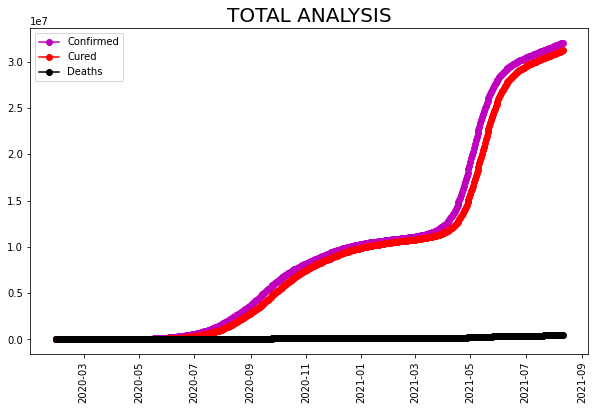

In [39]:
plt.figure(figsize= (10,6))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
p1 = plt.plot_date(data=data1,y= 'Confirmed',x= 'Date' ,linestyle ='-',color = 'm')
p2 = plt.plot_date(data=data1,y= 'Cured',x= 'Date' ,linestyle ='-',color = 'r')
p3 = plt.plot_date(data=data1,y= 'Deaths',x= 'Date' ,linestyle ='-',color = 'k')
plt.title("TOTAL ANALYSIS",  fontsize = 20)
plt.legend()

In [42]:
data_dict=data['State/UnionTerritory'].value_counts().to_dict()
data_dict

{'Andaman and Nicobar Islands': 504,
 'Andhra Pradesh': 518,
 'Arunachal Pradesh': 496,
 'Assam': 498,
 'Bihar': 506,
 'Bihar****': 2,
 'Cases being reassigned to states': 60,
 'Chandigarh': 511,
 'Chhattisgarh': 511,
 'Dadra and Nagar Haveli': 2,
 'Dadra and Nagar Haveli and Daman and Diu': 461,
 'Daman & Diu': 1,
 'Delhi': 528,
 'Goa': 504,
 'Gujarat': 510,
 'Haryana': 526,
 'Himachal Pradesh': 508,
 'Himanchal Pradesh': 1,
 'Jammu and Kashmir': 521,
 'Jharkhand': 498,
 'Karanataka': 1,
 'Karnataka': 520,
 'Kerala': 560,
 'Ladakh': 523,
 'Lakshadweep': 244,
 'Madhya Pradesh': 508,
 'Madhya Pradesh***': 1,
 'Maharashtra': 520,
 'Maharashtra***': 1,
 'Manipur': 506,
 'Meghalaya': 485,
 'Mizoram': 505,
 'Nagaland': 452,
 'Odisha': 514,
 'Puducherry': 512,
 'Punjab': 521,
 'Rajasthan': 527,
 'Sikkim': 445,
 'Tamil Nadu': 523,
 'Telangana': 102,
 'Telengana': 426,
 'Tripura': 492,
 'Unassigned': 3,
 'Uttar Pradesh': 526,
 'Uttarakhand': 515,
 'West Bengal': 512}

In [47]:
dict_keys=dict.keys()
print(dict_keys,'\n')

dict_values=dict.values()
print(dict_values)

dict_keys(['Kerala', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir', 'Punjab', 'Karnataka', 'Maharashtra', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'West Bengal', 'Puducherry', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura', 'Meghalaya', 'Dadra and Nagar Haveli and Daman and Diu', 'Nagaland', 'Sikkim', 'Telengana', 'Lakshadweep', 'Telangana', 'Cases being reassigned to states', 'Unassigned', 'Dadra and Nagar Haveli']) 

dict_values([3586693, 1436852, 953851, 1708812, 770114, 20411, 2579130, 322771, 599573, 2921049, 6363442, 1985182, 342462, 988997, 1534999, 121766, 1003356, 61992, 825085, 208616, 791980, 725279, 105424, 46320, 7548, 172085, 576149, 347440, 50605, 80660, 69769, 10654, 28811, 28018, 443360, 10263, 650353, 9265, 77, 10654])


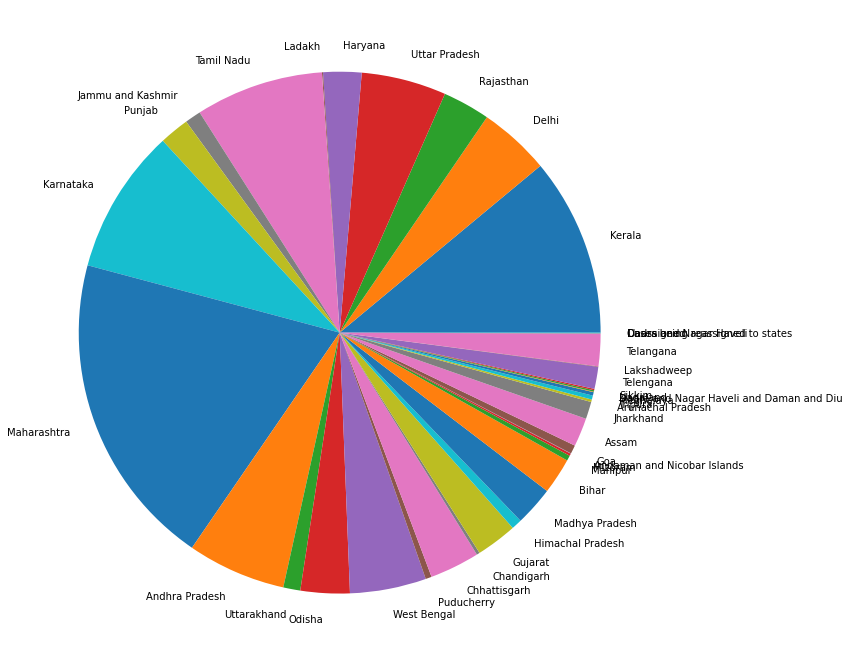

In [48]:
plt.figure(figsize= (25,12))
label = dict_keys
vals = dict_values
plt.pie(vals,labels=label)
plt.show()

In [58]:
#we will use state_Death table we made to analyse total deaths statewise
print(state_Cure.head())
fig = plt.figure(figsize=(20,10))

                        Cured
State/UnionTerritory         
Maharashtra           6159676
Maharashtra***        6000911
Kerala                3396184
Karnataka             2861499
Karanataka            2821491


<Figure size 1440x720 with 0 Axes>

In [57]:
print(state_Cure.head())
fig = plt.figure(figsize=(20,10))

                        Cured
State/UnionTerritory         
Maharashtra           6159676
Maharashtra***        6000911
Kerala                3396184
Karnataka             2861499
Karanataka            2821491


<Figure size 1440x720 with 0 Axes>